# Low mode phase speed

The analysis is performed in matlab 'low_mode_criticality_all.m'.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import munch
import utils
import glob

In [2]:
# Matlab analysis
dm = utils.loadmat("../proc_data/TG_phase_speed.mat")
angles = dm["angles"]
cp_us = dm["cp_us"]
cp_ds = dm["cp_ds"]
# Towyos separate
data_files = glob.glob("../proc_data/TY*.mat")
TYs = np.asarray([munch.munchify(utils.loadmat(file)) for file in data_files])
P5TYs = [TY for TY in TYs if ((TY.sill == "P5") and (TY.year == 2014))]
# Bathymetry
bathy = xr.open_dataset("../raw_data/merged_200_-171.5_-167.5_-11_-6.5.nc")
bathyP5 = bathy.isel(lon=(bathy.lon < -168.5) & (bathy.lon > -168.8), lat=(bathy.lat > -8.3) & (bathy.lat < -7.9))
# Towyos together
ds = xr.open_dataset("../proc_data/stacked_towyos.nc")
ds


<xarray.Dataset>
Dimensions:      (pfl: 614, z: 1401)
Coordinates:
  * z            (z) float64 -3.9e+03 -3.901e+03 ... -5.299e+03 -5.3e+03
  * pfl          (pfl) int64 0 1 2 3 4 5 6 7 ... 606 607 608 609 610 611 612 613
    lon          (pfl) float64 ...
    lat          (pfl) float64 ...
    x            (pfl) float64 ...
    y            (pfl) float64 ...
Data variables:
    T            (z, pfl) float64 ...
    S            (z, pfl) float64 ...
    CT           (z, pfl) float64 ...
    SA           (z, pfl) float64 ...
    u            (z, pfl) float64 ...
    v            (z, pfl) float64 ...
    sig4         (z, pfl) float64 ...
    sig4_sorted  (z, pfl) float64 ...
    b            (z, pfl) float64 ...
    b_sorted     (z, pfl) float64 ...
    eps          (z, pfl) float64 ...
    LT           (z, pfl) float64 ...
    Lo           (z, pfl) float64 ...
    N2_overturn  (z, pfl) float64 ...
    N2_ref       (z, pfl) float64 ...

Histogram of low mode phase speeds.

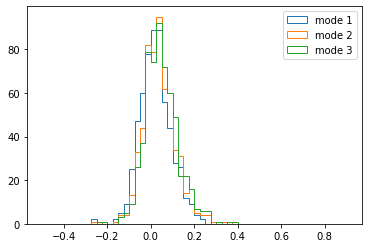

In [3]:
bins = np.linspace(-0.5, 0.9, 57)
fig, ax = plt.subplots()
ax.hist(cp_us[:, 0], bins=bins, histtype='step', label='mode 1')
ax.hist(cp_us[:, 1], bins=bins, histtype='step', label='mode 2')
ax.hist(cp_us[:, 2], bins=bins, histtype='step', label='mode 3')
# ax.hist(cp_ds[:, 0], bins=bins, histtype='step')
# ax.hist(cp_ds[:, 1], bins=bins, histtype='step')
# ax.hist(cp_ds[:, 2], bins=bins, histtype='step')
ax.legend()

Map of phase speeds

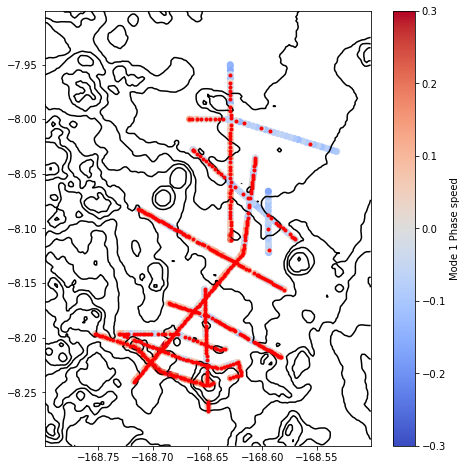

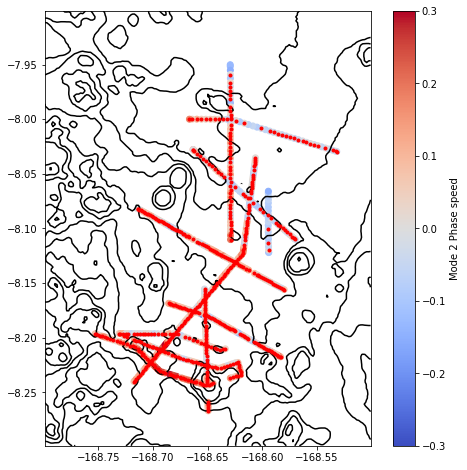

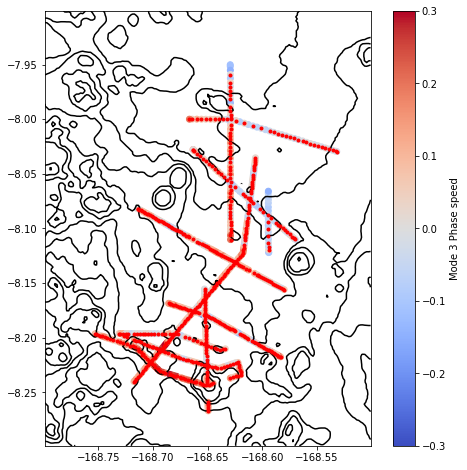

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax.contour(bathyP5.lon, bathyP5.lat, bathyP5.z, colors="k")
CS = ax.scatter(ds.lon, ds.lat, c=cp_us[:, 0], vmin=-0.3, vmax=0.3, cmap="coolwarm")
ax.plot(ds.lon[cp_us[:, 0] > -0.05], ds.lat[cp_us[:, 0] > -0.05], 'r.')
cb = plt.colorbar(CS)
cb.set_label("Mode 1 Phase speed")

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax.contour(bathyP5.lon, bathyP5.lat, bathyP5.z, colors="k")
CS = ax.scatter(ds.lon, ds.lat, c=cp_us[:, 1], vmin=-0.3, vmax=0.3, cmap="coolwarm")
ax.plot(ds.lon[cp_us[:, 1] > -0.05], ds.lat[cp_us[:, 1] > -0.05], 'r.')
cb = plt.colorbar(CS)
cb.set_label("Mode 2 Phase speed")

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax.contour(bathyP5.lon, bathyP5.lat, bathyP5.z, colors="k")
CS = ax.scatter(ds.lon, ds.lat, c=cp_us[:, 2], vmin=-0.3, vmax=0.3, cmap="coolwarm")
ax.plot(ds.lon[cp_us[:, 2] > -0.05], ds.lat[cp_us[:, 2] > -0.05], 'r.')
cb = plt.colorbar(CS)
cb.set_label("Mode 3 Phase speed")

Look at saved data.

Text(0.5, 0, 'u eig')

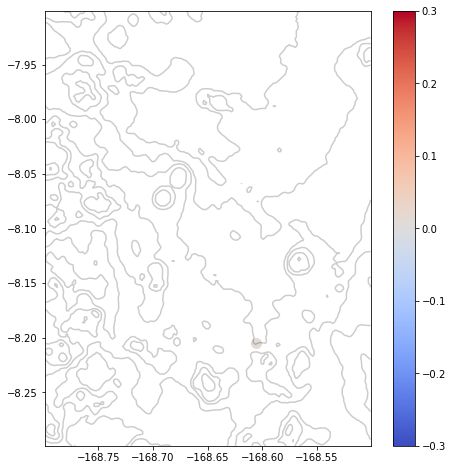

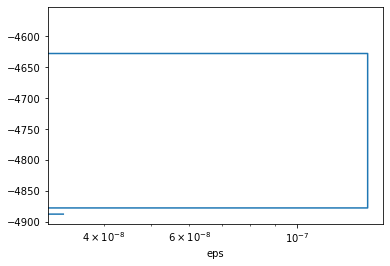

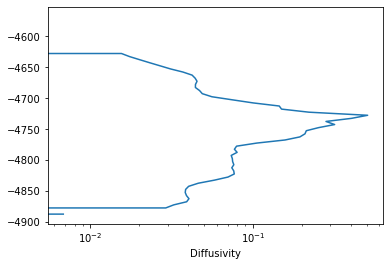

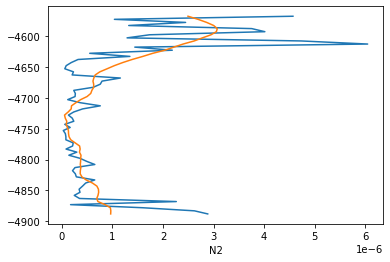

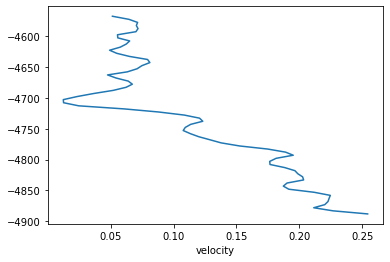

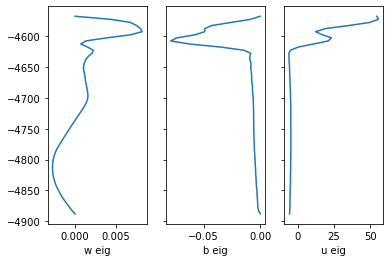

In [64]:
pfl = 250
i = 0

dsp = ds.isel(pfl=pfl)

p = munch.munchify(utils.loadmat("../proc_data/FGTG_p{:04d}.mat".format(pfl)))

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax.contour(bathyP5.lon, bathyP5.lat, bathyP5.z, colors="k", alpha=0.2)
CS = ax.scatter(dsp.lon, dsp.lat, c=p.cp[i], s=100, vmin=-0.3, vmax=0.3, cmap="coolwarm")
cb = plt.colorbar(CS)

fig, ax = plt.subplots()
ax.semilogx(p.epss, p.zs)
ax.set_xlabel("eps")

fig, ax = plt.subplots()
ax.semilogx(p.Kvs, p.zs)
ax.set_xlabel("Diffusivity")

fig, ax = plt.subplots()
ax.plot(p.bz, p.zs)
ax.plot(p.N2_refs, p.zs)
ax.set_xlabel("N2")

fig, ax = plt.subplots()
ax.plot(p.us, p.zs)
ax.set_xlabel("velocity")

fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].plot(p.we[:, i].real, p.zs, label="w")
axs[1].plot(p.be[:, i].real, p.zs, label="b")
axs[2].plot(p.ue[:, i].real, p.zs, label="u")
axs[0].set_xlabel("w eig")
axs[1].set_xlabel("b eig")
axs[2].set_xlabel("u eig")